# CSI2: algorithme des K plus proches voisins (KNN)

__Exemple introductif__: soient des individus reperés par deux caractéristiques numériques. On peut les représenter comme des points du plan.

Supposons que ces individus puissent se voir attribuer une étiquette A ou B et que nous disposions d'un certain nombre d'individus __déjà étiquetés__.

Un nouvel individu arrive (dont on connaît les caractéristiques) et on souhaite lui attribuer l'étiquette A ou B. La méthode des 3 plus proches voisins consiste à regarder l'étiquette majoritaire parmi les 3 plus proches voisins de notre nouvel individu.

Dans l'exemple ci-dessous le carré jaune (nouvel individu) se verra attribuer l'étiquette B (vert) par la méthode des `3` plus proches voisins car parmi ses 3 plus proches voisins il y a une majorité de verts.

Malheureusement en réalité il est impossible de représenter les individus dans le plan ou l'espace car ils ont trop de caractéristiques! (malédiciton de la dimension)

<div style="text-align:center">
 <img src="KNN_image.png" width="55%"/>
</div>
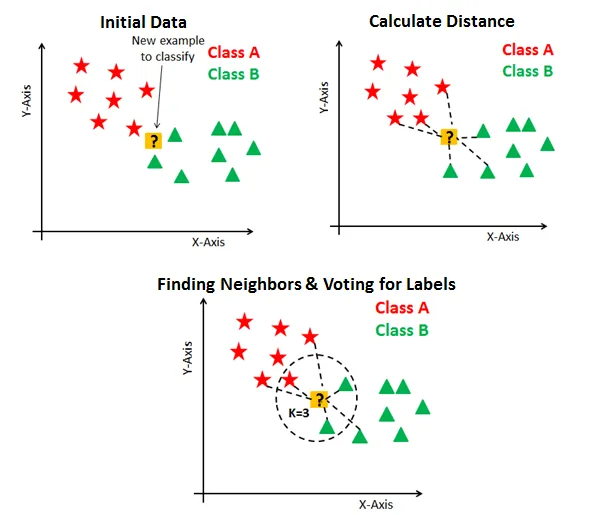

Nous allons découvrir un algorithme élémentaire d'apprentissage __supervisé__ permettant de faire de la __classification__ et de la __régression__.

L'adjectif __supervisé__ signifie que nous allons entraîner l'algorithme sur des données déjà classifiées (__étiquetées__) afin de lui permettre d'attribuer une étiquette à une donnée inconnue.

Par exemple: on fournit à l'algorithme un lot de fiches techniques (avec des __caractéristiques__ telles que longueur, largeur, hauteur, poids, nombre de portes, puissance, consommation etc) de voitures avec pour chacune son étiquette (berline, sportive, break, citadine,etc). Ces données constitue le jeu d'apprentissage qui constitue la partie __supervisée__. Par exemple l'étiquetage a été fait par un humain et est exact.

Ensuite on fournit une fiche technique d'une voiture qui n'est pas dans le jeu d'apprentissage et on demande à l'algorithme d'attribuer une étiquette à cette voiture.

En terme de vocabulaire nous avons des __individus__ (des voitures dans notre exemple!) représentés par $n$ __caractéristiques__ (numériques pour simplifier) et __étiquetés__. Les caractéristiques forment un vecteur de $\mathbf{R}^n$ et la __distance__ entre deux individus sera juste la distance entre les deux $n$-uplets les représentant. Nous prendrons la __distance euclidienne__ mais d'autre choix sont possibles.

On rappelle la distance euclidienne: si $x=(x_1,...,x_n)$ et $y=(y_1,...,y_n)$ alors:
$$d(x,y)=\sqrt{(x_1-y_1)^2+(x_2-y_2)^2+...+(x_n-y_n)^2}$$

<br>
<br>
<br>

>Q: compléter la fonction suivante qui calcule le carré de la distance euclidienne entre deux $n$-uplets représentés par des listes de longueur $n$:

```python
def distance_carree(L1,L2):
    S=0
    for i in range(len(L)):
        S=S+.....
    return(S)
````


Exemple: nos individus sont des véhicules

|label | longueur | largeur |hauteur|poids|puissance|nb portes|nb places| coffre | prix|
|------|----------|----|-----|-------|-----|------|-------|---|--|
| 3|4.5|1.9|1.5|1700|150|5|5|400|40000|
|1 |3.6|1.67|1.36|950|55|3|4|190|11000|
| 5|4.7|1.98|1.2|1200|320|2|2|230|90000|
|3 | 4.3|1.88|1.53|1430|125|5|5|380|34000|
|...


avec comme étiquettes (label):
+ 1: citadine
+ 2: compacte
+ 3: suv
+ 4: berline
+ 5: sportive
+ 6: break

Ici un individu est représenté par 9-uplet de caractéristiques. L'individu numéro `0` (en Python on indice à partir de `0`) est le vecteur `(4.5,1.9,1.5,1700,150,5,5,400,40000)` et a pour label `3`.

La distance entre les individus `0` et `2` est $\sqrt{(4.5-4.7)^2+(1.9-1.98)^2+(1.5-1.2)^2+...+(40000-90000^2)}$. Vous comprenez qu'il est important de normaliser les caractéristiques car ici le prix écrase complétement la hauteur par exemple. Mais c'est un aspect que nous ne gérerons pas.

## APPLICATION 1: CLASSIFICATION

On souhaite étiqueter un nouvel individu dont on connaît les caractéristiques.

L'algorithme est trés simple: on  cherche les $K$ individus les plus proches parmi les individus déjà étiquetés et on choisit pour étiquette celle qui est majoritaire parmi ces $K$ plus proches voisins.

Dans le cas d'une nouvelle voiture, si $K=7$ et que dans les $7$ plus proches voisins on trouve $4$ berlines, $2$ sportives et $1$ break on décidera que la fiche technique présentée est celle d'une berline. Ceci permet de résoudre un problème dit de __classification/étiquetage/labelisation__.

__Réalisation:__

On suppose donnée une liste `L` contenant les individus ayant `n` caractéristiques et déjà étiquetés. Chaque élément de `L` est donc une liste  de longueur `n+1` au format `[etiquette,caracteristique_1,caractéristique_2,...,caractéristique_n]`.

Dans l'exemple des voitures ci-dessus on aurait `n=9` et par exemple `L[0]=[3,4.5,1.9,1.5,1700,150,5,5,400,40000]` mais ici __on traite le cas général__.

>Q: Comment accéder à l'étiquette de l'individu numéro `i`?

>Q: Comment extraire la liste des caractéristiques de l'individu numéro `i`? (souvenez vous de la syntaxe du slicing, à connaître! Cherchez sur votre tel si besoin...)

>Q Compléter la fonction suivante, dans laquelle `N` est une liste de longueur `n` contenant les __caractéristiques__ d'un nouvel individu et `L` une liste d'individus déjà étiquetés comme expliqué ci-dessus, et qui retourne une liste `Dist` telle que `Dist[i]` soit le couple composé de l'étiquette de l'individu `i` et de la distance au carré entre `N` et l'individu numéro `i`.

```python
def liste_distances(N,L):
    Dist=....
    for liste in L:
        Dist.append((.....,distance(......,.......)))
    return .....
```

On peut trier une liste de couples suivant la seconde composante avec la syntaxe suivante: `liste=sorted(liste,key=lambda couple: couple[1])` 

Par exemple si `liste=[(1,4),(1,3),(2,6),(3,2)]` alors après `liste=sorted(liste,key=lambda couple: couple[1])` on a `liste` qui vaut `[(3,2),(1,3)(1,4),(2,6),]`

On peut ajouter cette instruction avant le `return` dans la fonction `liste_distance` afin de récupérer une liste classée par ordre de distance croissante.

__On suppose dans la suite que ceci a été fait!__

>Q: compléter la fonction suivante qui prend en entrée une liste `L` de couples `(etiquette,distance)` classés par `distance` croissante et un entier `K` et qui retourne un dictionnaire `D_occ` contenant le nombre d'occurences de chaque étiquette pour les `K` premiers éléments de `L`.

Par exemple si `L=[(3,2),(1,3)(1,4),(2,6),]` et `K=3` alors on doit récuperer le dictionnaire `{3:1,1:2}`.

```python
def nb_occ(L,K):
    D_occ={}
    for i in range(...):
        if L[0] in D_occ:
            D_occ[L[0]]=.....
        else:
            D_occ[L[0]]=.....
    return(D_occ)
```

> Q: Proposer une fonction `cle_max` telle que si `D` est un dictionnaire dont les valeurs sont numériques alors `cle_max(D)` retourne la -première- clé `key` telle que `D[key]` soit le maximum des valeurs de `D`. On rappelle que `D.keys()` et `D.values()` permettent d'itérer sur les clés/valeurs de `D`. On pourra compléter le corps suivant:

```python
def cle_max(D):
    max_so_far=0
    for cle,valeur in D.items():
        if valeur > ........:
            cle_max_so_far=....
            max_so_far=.......
    return ......
````


>Q: Proposer une séquence d'instructions reposant sur les fonctions précédentes permettant de déterminer l'étiquette d'un individu donné par son `n` uplet de caractéristiques `N` à l'aide de la liste `L` d'individus déjà étiquettés, en prenant les `K` plus proches voisins.

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

__Choix de $K$:__

On teste plusieurs valeurs de $K$ de la façon suivante:

On dispose d'un stock d'individus __tous étiquetés__.

On réserve une partie ( par exemple 80%) des individus pris au hasard comme jeu d'apprentissage $J_A$. Les 20% restants servent de jeu de test $J_T$.

Pour chaque individu du jeu de test $J_T$, on va calculer l'étiquette majoritaire parmi ses $K$ plus proches voisins dans $J_A$.

On compare cette étiquette "prédite" avec l'étiquette réelle que l'on connaît et on calcule la proportion de prédictions exactes.

On répète ceci avec plusieurs valeurs de $K$ et on garde celle qui donne le meilleur taux de réussite.

Les résultats de ce test peuvent être regroupés dans une matrice appelée ___matrice de confusion___:

On suppose avoir $p$ étiquettes disponibles $e_1,...,e_p$, un jeu d'apprentissage $J_A=\{I_1,...,I_s\}$ et d'un jeu de test $J_T=\{J_{1},...,J_t\}$ alors la matrice de confusion est la matrice $C$ telle que $C_{i,j}$ égale le nombre d'individus de $J_T$ d'étiquette réelle $e_i$ et d'étiquette prédite $e_j$.

Supposons avoir 3 étiquettes 
1
,
2
,
3
, un jeu de test et la matrice de confusion suivante pour 
$K=5:\begin{pmatrix}4&0&3\\2&7&1\\2&0&13\end{pmatrix}$

>Q: Quel est le cardinal du jeu de test?
<br>
<br>

>Q: Peut-on trouver le cardinal du jeu d'apprentissage?
<br>
<br>

>Q: Combien y-a-t'il d'individus d'étiquette réelle 3?
<br>
<br>

>Q: Quelle est le pourcentage d'individus correctement étiquetés par l'algorithme des $5$ plus proches voisins?
<br>
<br>
 
>Q On prend maintenant $K=20$ et on obtient la matrice de confusion suivante:
$\begin{pmatrix}5&0&2\\2&5&3\\2&0&13\end{pmatrix}$
Prendre davantage de voisins améliore-t'il les prédictions dans ce cas?
<br>
<br>
<br>
<br>

### Application n° 2: PREDICTION (on parle aussi de régression, lecture seule).

Exemple: le Tacos de Toulon fabrique chaque jour des galettes d'une fraîcheur incomparable. Il a noté pour chaque jour de l'année dernière:

1. La méteo, entre 0 (mauvais temps) et 5 (temps magnifique)
2. Le type de journée 0 (jour de classe), 1 (jour de vacances scolaire hors WE), 2 (WE)
3. S'il y a match au stade Mayol: 0 si non, 1 si oui
4. Le nombre de tacos vendus.

Samedi prochain le RCT joue à domicile, il est prévu un soleil voilé. Les caractéristiques de cette journée sont donc $(1,2,4)$. On va chercher dans l'agenda par exemple les $5$ plus proches voisins de $(4,2,1)$. Supposons que l'on trouve:

|       |le 13/2 | le 23/4 | le 2/6 | le 21/8 | le 19/12 |
|-----|-------|---------|--------|---------|----------|
|ventes| 125   |230  |135    |210    |100  |

Alors il pourra prévoir de vendre $\frac{125+230+135+210+100}{5}=160$ tacos.


NB: tout l'art du "data analyst" est de choisir la bonne valeur de $K$ et surtout les bonnes caractéristiques (_features_) pour décrire un individu.